enter chemical system:

 example:C-O


 Li-Fe-O


Materials Property Explorer

Sorting by density...


Retrieving SummaryDoc documents:   0%|          | 0/176 [00:00<?, ?it/s]


Exploration complete!


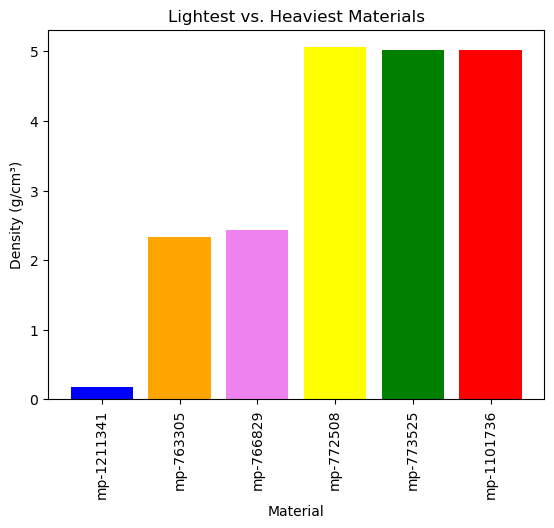

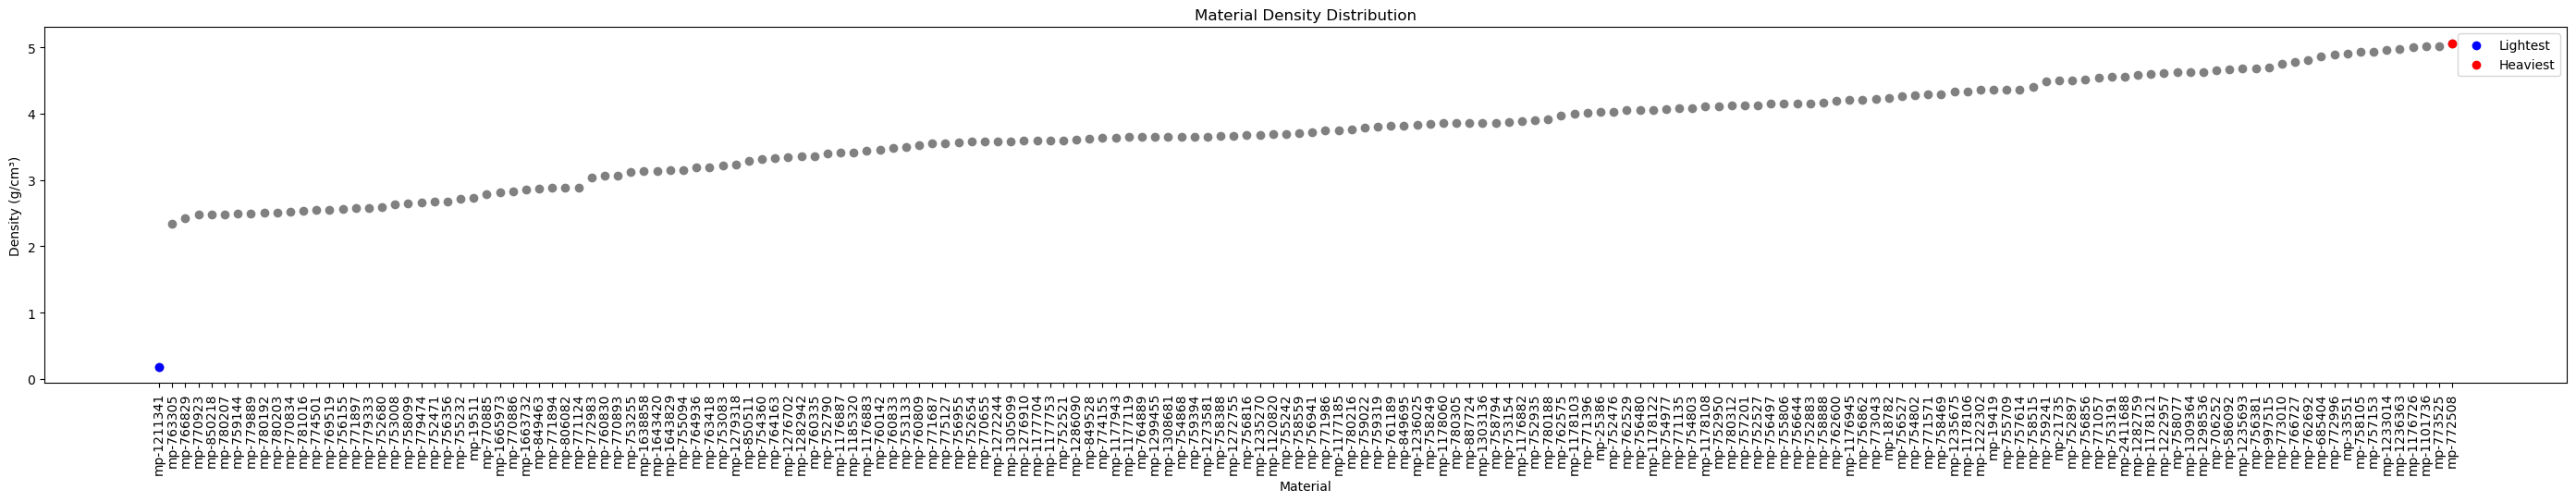

show table? y/n:


 y


,material_id,formula,density,formation_energy,volume,crystal_system,structure
88,mp-1211341,Li3FeO6,0.181168,-0.146007,1582.600705,Orthorhombic,"[[ 0. 0. -17.12851736] Li, ..."
141,mp-763305,Li8FeO6,2.334590,-1.968938,294.994036,Orthorhombic,"[[1.94553673 3.36024988 2.52277082] Li, [1.692..."
28,mp-766829,Li15(FeO4)4,2.429376,-1.798949,797.653579,Monoclinic,"[[5.88791252 8.22165258 1.34682594] Li, [3.382..."
112,mp-770923,Li5FeO4,2.480480,-1.970647,413.843014,Monoclinic,"[[9.12830861 3.50965654 7.92487594] Li, [5.215..."
62,mp-850218,Li35(FeO4)8,2.483035,-1.935224,803.625342,Triclinic,"[[3.45709162 1.29920938 8.48878052] Li, [1.168..."
...,...,...,...,...,...,...,...
4,mp-1236363,Li(Fe2O3)4,4.970073,-1.527047,215.731202,Triclinic,"[[6.20716052 3.58545161 3.94078056] Li, [0.784..."
154,mp-1176726,LiFe3O4,4.993785,-1.673904,158.595024,Monoclinic,"[[2.0915155 2.172567 0. ] Li, [-2.09151..."
153,mp-1101736,LiFe3O4,5.018470,-1.673856,78.907460,Triclinic,"[[-1.48982402 2.19943537 -1.43482232] Li, [-1..."
156,mp-773525,LiFe3O4,5.018471,-1.672052,78.907448,Monoclinic,"[[-1.532067 -2.588143 0. ] Li, [0. 0. 0...."


search again? y/n:


 y


enter new chemical system:


 C


Materials Property Explorer

Sorting by density...


Retrieving SummaryDoc documents:   0%|          | 0/64 [00:00<?, ?it/s]


Exploration complete!


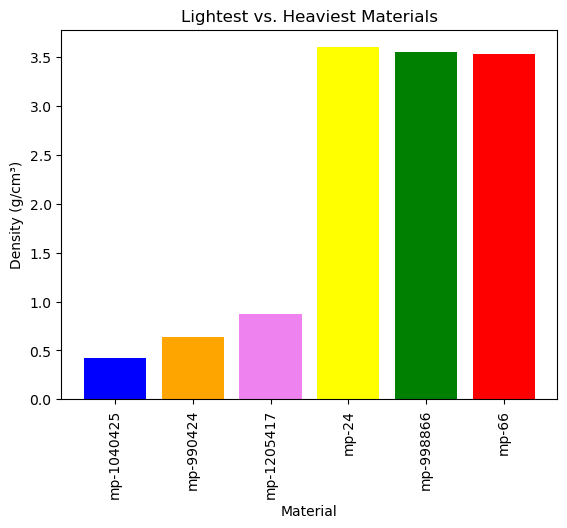

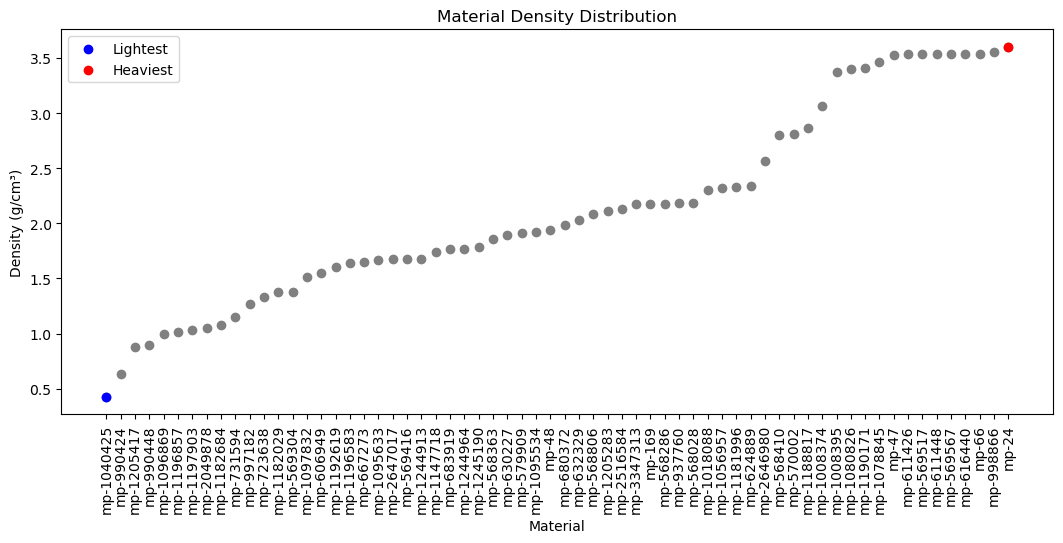

show table? y/n:


 n


search again? y/n:


 y


enter new chemical system:


 O-Rb-F


Materials Property Explorer

Sorting by density...


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]


Exploration complete!


IndexError: single positional indexer is out-of-bounds

In [9]:
#Density sorter script #get all your imports out of the way
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mp_api.client import MPRester
import plotly.express as px
import plotly.graph_objects as go
from pymatgen.core import Structure
from pymatgen.core.composition import Composition
#import crystal_toolkit
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

API_KEY = "PUT YOUR API KEY HERE" #put your own key in, this one's mine (it's not there anymore)

def densitySorter(search): #define a function to use later for however many searches are done
    """
    Query for density of materials and create a visualization for a selected chemical system. 
    """
    print("Materials Property Explorer") #^^^^ say stuff so you understand what's happening after you search ^^^^^
    print("==========================") 
    
    print("\nSorting by density...") #loading symbol so the program feels more responsive
    
    # Connect to Materials Project with API key
    with MPRester(API_KEY) as mpr:
        # Query for all the materials in that chemical system
        docs = mpr.materials.summary.search( #make documents and then put data from the material summaries in those docs
            chemsys=[search], #only do this for materials that match the searched chemicalsystem
            fields=[ #put the following things in the doc. Thanks.
                "material_id", #gets the info it says on the tin and puts it into the doc, repeat for the other ones
                "formula_pretty", 
                "structure", 
                "density", 
                "formation_energy_per_atom",
                "volume", 
                "symmetry"
            ] #end list
        ) #end search
        
        # Extract data to a list of dictionaries
        data = [] #setup a list to add stuff to (also handily resets this list every time the search is used)
        for doc in docs: #for however many documents we made put all the data we put in docs earlier into a big table (a list of lists(docs actually))
            # Get crystal system from symmetry object if available
            try:
                crystal_system = doc.symmetry.crystal_system if hasattr(doc, 'symmetry') else "Unknown"
            except:
                crystal_system = "Unknown"
                
            data.append({ #actually put the data from the docs in the list so that it can be made into a dataframe
                "material_id": doc.material_id, #extract material id from doc doc.material_id
                "formula": doc.formula_pretty, #extract etc etc
                "density": doc.density,
                "formation_energy": doc.formation_energy_per_atom,
                "volume": doc.volume,
                "crystal_system": crystal_system,
                "structure": doc.structure
            })
            
        
        # Convert to DataFrame
        df = pd.DataFrame(data) #make it a dataframe
        df_sorted = df.sort_values(by="density") #sort the values by density in ascending order (lowest densities are earlier on the list)
        
        print("\nExploration complete!") #show that work is done
        # Select the lightest and heaviest materials
        lightest = df_sorted.iloc[0]  # First row (lowest density)
        light2 = df_sorted.iloc[1] #2nd lowest density
        light3 = df_sorted.iloc[2] #3rd lowest density
        heaviest = df_sorted.iloc[-1]  # Last row (highest density)
        heavy2 = df_sorted.iloc[-2] #2nd highest density
        heavy3 = df_sorted.iloc[-3] #3rd highest density

        # Create bar chart
        plt.bar([lightest["material_id"],light2["material_id"],light3["material_id"], heaviest["material_id"],heavy2["material_id"],heavy3["material_id"]], [lightest["density"],light2["density"],light3["density"], heaviest["density"],heavy2["density"],heavy3["density"]],color=['blue','orange','violet','yellow','green','red'])
        plt.xticks(rotation=90) #rotate the x-axis label so it's easier to read and not really comically wide
        #vvvvvvv labels (and titles) vvvvvvv
        plt.xlabel("Material")
        plt.ylabel("Density (g/cm³)")
        plt.title("Lightest vs. Heaviest Materials")
        # ^^^^^ titles (and labels) ^^^^^^
        plt.show() #make it show up
        num_rows = len(df_sorted) #figure out how many materials are in this chemical system
        plt.figure(figsize=(num_rows/5, 5)) #adjust scatter plot size based on total number of materials so the labels can be read
        plt.scatter(df_sorted["material_id"], df_sorted["density"], color='gray') #make a scatter plot
        plt.scatter(lightest["material_id"], lightest["density"], color="blue", label="Lightest") #add the lightest point with it's label to the plot
        plt.scatter(heaviest["material_id"], heaviest["density"], color="red", label="Heaviest") #add the heaviest point with its label to the plot
        plt.xticks(rotation=90) #rotate the x-axis labels (it was so bad before this)
        #in this house we stand for the flag and kneel for the [labels (and titles)]
        plt.xlabel("Material") 
        plt.ylabel("Density (g/cm³)")
        plt.title("Material Density Distribution")
        plt.legend()
        #in this house we kneel for the cross and stand for the [titles (and labels)]
        plt.show() #make the graph show up
        dis = "n"                                       #make the table not show up unless wanted (dis is short for "display")
        print("show table? y/n:") #ask if you want to do ^^^^^
        dis = input() #take an input to know if you ^^^^
        if dis =="y": #check if you want to make the table show up
            display(df_sorted) #display it if you do want it
        cont = "n" #set continue status to no, until told otherwise (do not graph until graphen to[search? searchon?])
        print("search again? y/n:") #ask question
        cont = input() #answer question
        if cont =="y": #react to question
            print("enter new chemical system:")
            search = input()
            densitySorter(search) #put the new data back into the system
        else:
            print("Have a great day") #mandatory [not optional]
        return #it is done

print("enter chemical system:") #ask them the first time
print(f"\n example:C-O") #to stop you from putting things in weird (please)
search = input() #thy search is my command #set the chemical system for the first search
densitySorter(search) #put it through 'the algorithm'

